In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from geopy.geocoders import Nominatim
from geopy import distance
from geopy.distance import geodesic
import census
import pandas as pd
import geopandas as gpd
import censusdata
import censusgeocode as cg
import geopy
from geopy.geocoders import Nominatim
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
import requests

In [ ]:
!pip install census
!pip install censusdata
!pip install censusgeocode
!pip install geopy
!pip install geopandas
!pip install plotly_express

In [111]:
comp = pd.read_excel('AlabamaCompDF.xlsx')
comp = comp.drop(columns=['Unnamed: 0','NumOfKohl'])
comp

,Tract,County,Store,TotalVists,TotalNumOfCompetitors,TotalCompetitorVisits
0,1300,55,Lowes,1097125,1,1097125
1,6403,97,Lowes,1086898,1,1086898
2,40801,69,Lowes,1019649,1,1019649
3,965002,43,Lowes,1016884,1,1016884
4,12003,73,Lowes,1005913,1,1005913
...,...,...,...,...,...,...
75,41101,81,Kohls,261396,2,1244629
76,1101,15,Kohls,259798,2,816921
77,1902,89,Kohls,245017,1,245017
78,300,103,Kohls,210262,1,210262


In [112]:
newDF = pd.DataFrame()
for a in range(0,len(comp)):
    county = comp.County[a]
    countyDF = comp[comp['County'] == county]
    countyDF.reset_index(inplace=True, drop=True)
    
    for b in range(0, len(countyDF)):
        tract = countyDF.Tract[b]
        tractDF = countyDF[countyDF['Tract'] == tract]
        tractDF.reset_index(inplace=True, drop=True)
       
       
        NumOfKohl = 0
        NumOfLowe = 0
      
        NumOfHomeDepot = 0
        
        VisitsOfKohl = 0
        VisitsOfLowe = 0
      
        VisitsOfHomeDepot = 0
        
        
        for i,j in tractDF.iterrows():
                
        
          
                
            if (j['Store'] == 'Kohls'):
                NumOfKohl = NumOfKohl + 1
                VisitsOfKohl = j['TotalVists']
                
            if (j['Store'] == 'Lowes'):
                NumOfLowe = NumOfLowe + 1
                VisitsOfLowe = j['TotalVists']
            
                
            if (j['Store'] == 'The Home Depot'):
                NumOfHomeDepot = NumOfHomeDepot + 1
                VisitsOfHomeDepot = j['TotalVists']
            
        
                
        data = {
                'Tract' : tract,
                'County'  : county,
                'TotalNumOfCompetitors' : tractDF.iloc[0]['TotalNumOfCompetitors'],
                'TotalCompetitorVisits' : tractDF.iloc[0]['TotalCompetitorVisits'],
               
                'NumOfKohl' : NumOfKohl,
                'NumOfLowe' : NumOfLowe,
               
                'NumOfHomeDepot' : NumOfHomeDepot,
                
                'VisitsOfKohl' : VisitsOfKohl,
                'VisitsOfLowe' : VisitsOfLowe,
              
                'VisitsOfHomeDepot' : VisitsOfHomeDepot
                
               }
        data = pd.DataFrame(data, index=[0])
        newDF = pd.concat([newDF, data])

newDF.reset_index(inplace=True, drop=True)
newDF.drop_duplicates(subset=None, keep="first", inplace=True)

In [113]:
census = pd.read_excel('Alabama Census Data.xlsx')

In [114]:
rent =  pd.read_excel('AlabamaPropertyTractAverageRent.xlsx')

In [115]:
censusRent = census.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRent
censusRent = censusRent.drop(columns=['Unnamed: 0'])

In [116]:
mars = pd.read_excel('marshalls-alabama.xlsx')
mars

,Rank,Name,TotalVisits,lat,lng
0,1,Marshalls,579489,34.674807,-86.545725
1,2,Marshalls,560818,30.377885,-87.686324
2,3,Marshalls,459410,32.359685,-86.158587
3,4,Marshalls,418587,30.677611,-88.122608
4,5,Marshalls,395458,33.361058,-86.853866
5,6,Marshalls,330430,33.639105,-86.627715
6,7,Marshalls,266024,34.754304,-86.747758


In [117]:
marsDF = pd.DataFrame()
j = 0
for i in  list(range(0,len(mars))):
    print(i)
    try:
        CensusGeoData1 = cg.coordinates(x=mars.lng[i], y= mars.lat[i])
        
    except:
        pass
    
    else:
        marsDF.loc[j, 'Tract']  = CensusGeoData1 ['Census Tracts'][0]['TRACT']
        marsDF.loc[j,'County'] = CensusGeoData1 ['Census Tracts'][0]['COUNTY']
        marsDF.loc[j,'TotalVisits'] = mars.TotalVisits[i]
        j = j + 1
    
marsDF.head()        

0
1
2
3
4
5
6


,Tract,County,TotalVisits
0,001902,089,579489.0
1,011503,003,560818.0
2,005412,101,459410.0
3,002800,097,418587.0
4,014414,073,395458.0


In [118]:
marsDF['Tract'] = marsDF['Tract'].astype(int)
marsDF['County'] = marsDF['County'].astype(int)

In [119]:
censusRentStore = marsDF.merge(
    censusRent,
    "inner",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)
censusRentStore['AvgRent'] = censusRentStore['AvgRent'] .fillna(0)
censusRentStore

,Tract,County,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent
0,1902,89,579489.0,78,510,406,54,126,109,510,79,794,221,1010,1514.0
1,11503,3,560818.0,588,1761,1613,164,579,63,1761,1193,1670,2730,2264,1036.4
2,5412,101,459410.0,486,1296,1365,358,537,84,1296,266,1735,1174,2462,0.0
3,2800,97,418587.0,95,1033,929,89,253,0,1033,588,1185,1248,1222,800.5
4,14414,73,395458.0,543,1633,362,296,503,324,1633,652,1426,797,3055,0.0
5,11113,73,330430.0,307,1019,480,81,227,44,1019,553,890,1031,1535,0.0
6,10612,89,266024.0,509,1691,866,617,456,171,1691,740,1371,1250,2777,1330.5


In [120]:
trainData = censusRentStore.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

trainData = trainData.fillna(0)
trainData = trainData.drop(columns=['Tract','County'])
trainData

,TotalVisits,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,...,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
0,579489.0,78,510,406,54,126,109,510,79,794,...,1010,1514.0,1.0,245017.0,1.0,0.0,0.0,245017.0,0.0,0.0
1,560818.0,588,1761,1613,164,579,63,1761,1193,1670,...,2264,1036.4,2.0,1323146.0,0.0,1.0,1.0,0.0,756522.0,566624.0
2,459410.0,486,1296,1365,358,537,84,1296,266,1735,...,2462,0.0,1.0,305495.0,1.0,0.0,0.0,305495.0,0.0,0.0
3,418587.0,95,1033,929,89,253,0,1033,588,1185,...,1222,800.5,1.0,950153.0,0.0,1.0,0.0,0.0,950153.0,0.0
4,395458.0,543,1633,362,296,503,324,1633,652,1426,...,3055,0.0,1.0,306940.0,1.0,0.0,0.0,306940.0,0.0,0.0
5,330430.0,307,1019,480,81,227,44,1019,553,890,...,1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,266024.0,509,1691,866,617,456,171,1691,740,1371,...,2777,1330.5,3.0,1932561.0,1.0,1.0,1.0,398543.0,838897.0,695121.0


In [121]:
#Test data 
censusTest = pd.read_excel('Alabama Census Data.xlsx')

censusTestRent = censusTest.merge(
    rent,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

censusTestRent = censusTestRent.drop(columns=['Unnamed: 0'])

testData = censusTestRent.merge(
    newDF,
    "left",
    ['Tract','County'],
    suffixes=("_x", "_y"),
    validate='one_to_one'
)

testData = testData.fillna(0)
censusRentStoreCopy = censusRentStore
testData = testData[~testData.County.isin(censusRentStoreCopy['County'])]
tractCountyDF = testData[['Tract','County']]
testData = testData.drop(columns=['Tract','County'])
data = testData
testData

,TotalFemale40to49,FamilyHouseholds,NonFamilyHouseholds,NumberOfHouseholdIncomeLessThan100000,NumberOfHouseholdIncomeLessThan150000,NumberOfHouseholdIncomeLessThan200000,NumofEarnersInFamily,Population30to39,PopulationAbove60,Age15PopulationNeverMarried,Age15PopulationMarried,AvgRent,TotalNumOfCompetitors,TotalCompetitorVisits,NumOfKohl,NumOfLowe,NumOfHomeDepot,VisitsOfKohl,VisitsOfLowe,VisitsOfHomeDepot
159,203,1178,693,135,151,29,1178,433,1370,596,2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,284,862,605,127,119,26,862,280,1067,956,1375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,131,411,317,47,153,0,411,212,529,360,662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,360,1166,399,166,354,57,1166,425,1014,618,2129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,89,106,317,14,3,3,106,143,190,1133,169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,33,362,86,63,58,6,362,155,278,126,733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,215,1123,453,131,340,20,1123,367,1327,707,2121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,223,738,223,128,119,80,738,96,989,478,1260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,421,1159,533,352,144,82,1159,444,973,749,1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [123]:
X, y = trainData.iloc[:,1:],trainData.iloc[:,0]

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=33)

Training score:  0.9999999999978745
RMSE: 163758.43


/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/param/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


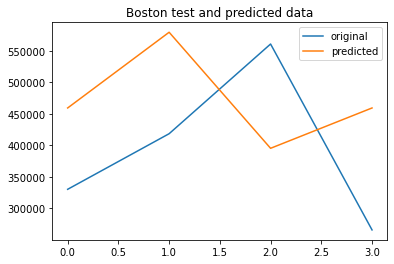

[459409.97 579488.8  395457.97 459409.97]


In [125]:
from sklearn.model_selection import cross_val_score, KFold
xgbr = xgb.XGBRegressor(verbosity=0) 

xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, y_train,cv=3)

ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

preds = xgbr.predict(testData)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.legend()
plt.show()

print(ypred)

In [126]:
predDF = pd.DataFrame(preds)
predDF.columns = ['Score']
predDF.reset_index(inplace=True, drop=True)
data.reset_index(inplace=True, drop=True)
tractCountyDF.reset_index(inplace=True, drop=True)

In [127]:
for i in list(range(0,len(data))):
    data.loc[i,'Prediction'] =  predDF.loc[i,'Score']
    data.loc[i, 'Tract'] = tractCountyDF.loc[i,'Tract']
    data.loc[i, 'County'] = tractCountyDF.loc[i,'County']
    
    

In [128]:
data.to_excel('Alabama Marshalls Prediction.xlsx')